## Importing libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/zomato-bangalore-restaurants/zomato.csv


## Reading dataset

In [2]:
df = pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [5]:
df.sample(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
20948,https://www.zomato.com/bangalore/cakezone-btm?...,"3 & 4, 6th Cross, 1st Main, 2nd Stage, BTM, Ba...",CakeZone,No,No,4.1/5,338,080 39513573\r\n+91 9916888854,BTM,Bakery,"Cheesecake, Chocolate Truffle, Cup Cake","Bakery, Desserts",500,"[('Rated 5.0', ""RATED\n You haven't tasted an...",[],Desserts,Jayanagar
45272,https://www.zomato.com/bangalore/muttonwah-air...,"14, 1st Floor, Old Airport Road, Bangalore",Muttonwah!,No,No,NaN,0,+91 9742428006\n+91 8971053132,Old Airport Road,"Takeaway, Delivery",NaN,North Indian,500,[],[],Delivery,Old Airport Road
15464,https://www.zomato.com/bangalore/m-m-a-kabab-r...,"#92/3 MM road, Frazer Town, Bangalore",M.M.A. Kabab & Rolls,Yes,No,3.5/5,7,+91 9741995820\r\r\n+91 6360658833,Frazer Town,Quick Bites,NaN,"Arabian, Mughlai, Chinese, Kebab, Fast Food",400,[],[],Dine-out,Frazer Town
15610,https://www.zomato.com/bangalore/shezan-cunnin...,"Sultan Shah Complex, Cunningham Road, Bangalore",Shezan,Yes,No,4.1/5,391,080 22287895\r\n080 22262195,Cunningham Road,Casual Dining,"Mudpie, Butter Naan, Mutton Biryani, Kulfi, St...","Chinese, Continental, North Indian, Mughlai, S...",600,"[('Rated 5.0', 'RATED\n This place has a love...",[],Dine-out,Frazer Town
5469,https://www.zomato.com/bangalore/troll-indiran...,"1099, 12th Main, 5th Cross, HAL 2nd Stage, Ind...",Troll,Yes,No,3.8/5,102,+91 8147868986,Indiranagar,Dessert Parlor,"Ice Cream Roll, Oreo Ice Cream, Rolls, Chocola...","Desserts, Ice Cream",300,"[('Rated 3.0', 'RATED\n Ordered choco lava ov...","['Chocopeaco Ice Cream', 'Little Liechee Ice C...",Delivery,Brigade Road


In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df.shape

(51717, 17)

##### Let's remove some columns which we don't need in our analysis

In [8]:
unwanted_columns = ['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list']

In [9]:
df.drop(unwanted_columns, axis = 1, inplace = True)

In [10]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [12]:
df.isna().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

#### Dropping the duplicate values

In [13]:
df.duplicated().sum()

108

In [14]:
df.drop_duplicates(inplace = True)

#### Data Cleaning column by column

#### Rate

In [15]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
df['rate'].value_counts(dropna = False)

NaN       7755
NEW       2195
3.9/5     2095
3.8/5     2020
3.7/5     2009
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 65, dtype: int64

##### We need to treat these "NEW", "-", "/5" and making rate as float values

In [17]:
def handleRate(val):
    if val == 'NEW' or val == '-':
        return np.nan
    else:
        val = str(val).split('/')
        val = val[0]
        return float(val)

In [18]:
df['rate'] = df['rate'].apply(handleRate)

In [19]:
df['rate'].value_counts(dropna = False).head(7)

NaN    10019
3.9     3967
3.8     3870
3.7     3814
3.6     3311
4.0     3180
4.1     2942
Name: rate, dtype: int64

##### Handeling NULL values in this field

In [20]:
df['rate'].fillna(round(df['rate'].mean(),1), inplace = True)

In [21]:
df['rate'].value_counts(dropna = False).head(7)

3.7    13833
3.9     3967
3.8     3870
3.6     3311
4.0     3180
4.1     2942
3.5     2781
Name: rate, dtype: int64

#### Dropping rest NULL values as they are less

In [22]:
df.dropna(inplace = True)
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

#### Rename some of the columns

In [23]:
df.rename(columns = {'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'Type', 'listed_in(city)':'City'}, inplace = True)
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost2plates', 'Type', 'City'],
      dtype='object')

#### Exploring different fields

In [24]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [25]:
df['location'].value_counts()

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [26]:
df['City'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [27]:
df['City'].value_counts().head(5)

BTM                      3239
Koramangala 7th Block    2901
Koramangala 5th Block    2799
Koramangala 4th Block    2742
Koramangala 6th Block    2588
Name: City, dtype: int64

##### Here both the fields 'City' and 'location' shows information related to restaurant's locations and they also have similar kind of data so we can drop either of the field

In [28]:
df.drop('City', axis = 1, inplace = True)
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost2plates', 'Type'],
      dtype='object')

##### Cost2plates

In [29]:
df['Cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

Here '1,300' and similar kind of values need to be cleaned. So let's remove ',' from those values.

In [30]:
def handleComma(val):
    val = str(val)
    if ',' in val:
        val = val.replace(',', '')
        return float(val)
    else:
        return float(val)

In [31]:
df['Cost2plates'] = df['Cost2plates'].apply(handleComma)

In [32]:
df['Cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

#### Restaurant Type

In [33]:
rest_types = df['rest_type'].value_counts(ascending = False)
rest_types

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

Let's do clustering for which have types less than 1000 in this list as others

In [34]:
rest_type_lessthan1000 = rest_types[rest_types < 1000]
rest_type_lessthan1000

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

In [35]:
def handle_rest_type(val):
    if val in rest_type_lessthan1000:
        return 'Others'
    else:
        return val

In [36]:
df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
Others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

#### Location

Let's do same for this field as we've done for rest_type

In [37]:
location = df['location'].value_counts(ascending = False)
location

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [38]:
location_lessthan300 = location[location<300]
location_lessthan300.head()

Koramangala 8th Block    294
Vasanth Nagar            293
Jeevan Bhima Nagar       268
Wilson Garden            246
Bommanahalli             236
Name: location, dtype: int64

In [39]:
def handle_location(val):
    if val in location_lessthan300:
        return 'Others'
    else:
        return val

In [40]:
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts().head()

BTM                      5056
Others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Name: location, dtype: int64

#### Cuisines

In [41]:
cuisine = df['cuisines'].value_counts(ascending = False)
cuisine

North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: cuisines, Length: 2704, dtype: int64

In [42]:
cuisines_lessthan100 = cuisine[cuisine<100]
cuisines_lessthan100.head()

North Indian, Continental, Chinese    97
Juices                                94
Fast Food, North Indian               93
Bengali, North Indian                 93
Beverages, Juices                     90
Name: cuisines, dtype: int64

In [43]:
def handle_cuisines(val):
    if val in cuisines_lessthan100:
        return 'Others'
    else:
        return val

In [44]:
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts().head()

Others                   26159
North Indian              2852
North Indian, Chinese     2351
South Indian              1820
Biryani                    903
Name: cuisines, dtype: int64

#### Type

In [45]:
df['Type'].value_counts()

Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: Type, dtype: int64

No need to clean this field

## Plotting and Visualization

#### Count plot of various locations

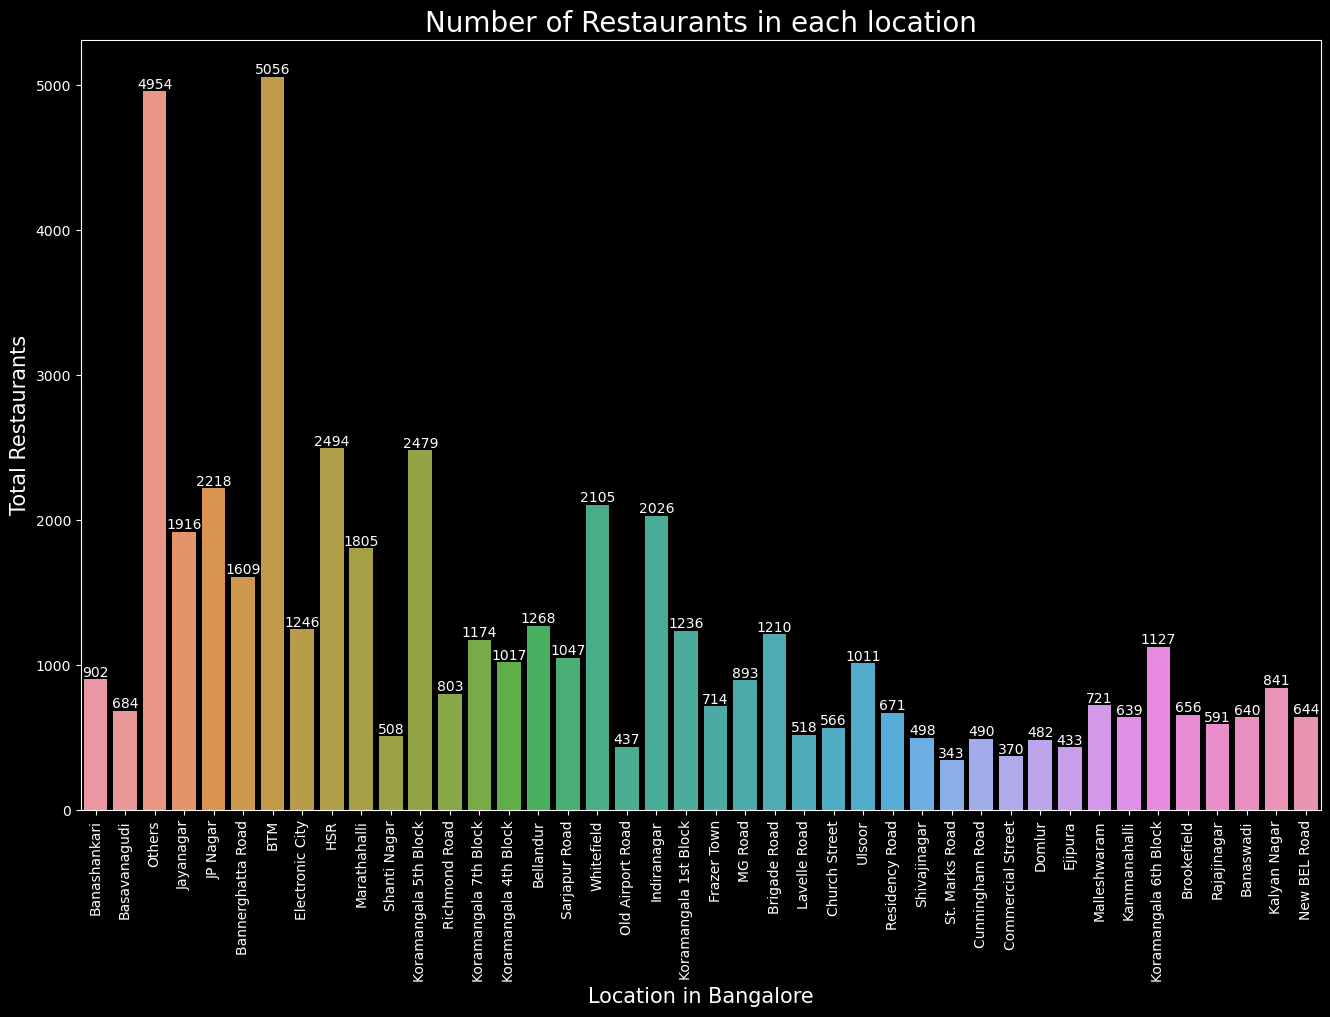

In [46]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x='location', data=df)
plt.xticks(rotation = 90)
plt.xlabel("Location in Bangalore", fontsize=15)
plt.ylabel("Total Restaurants", fontsize=15)
plt.title("Number of Restaurants in each location", fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

If anyone want to open a new restaurant then if they open a restaurant in the location at where the number of restaurants are less then they can grow their business faster like 'Ejipura', 'St. Marks Road' etc. But this is not only depends on this competition factor other factors also matter here.

#### Online orders

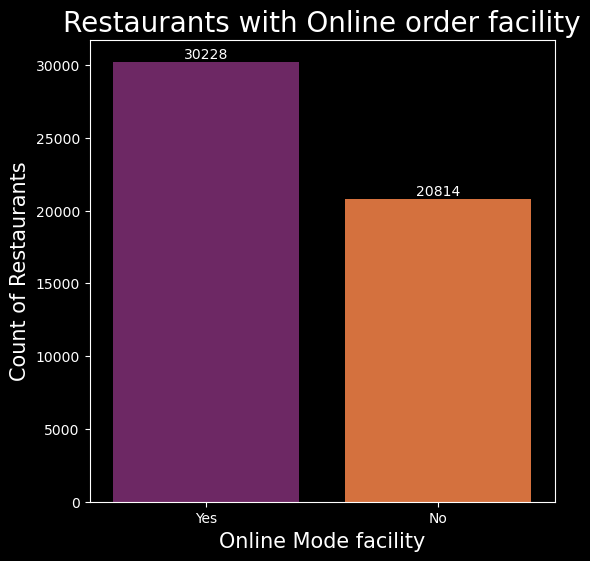

In [47]:
plt.figure(figsize = (6,6))
ax = sns.countplot(x = 'online_order',data=df, palette = 'inferno')
plt.xlabel("Online Mode facility", fontsize=15)
plt.ylabel("Count of Restaurants", fontsize=15)
plt.title("Restaurants with Online order facility", fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

Majority of the restaurants have Online order facilities

### Book Table

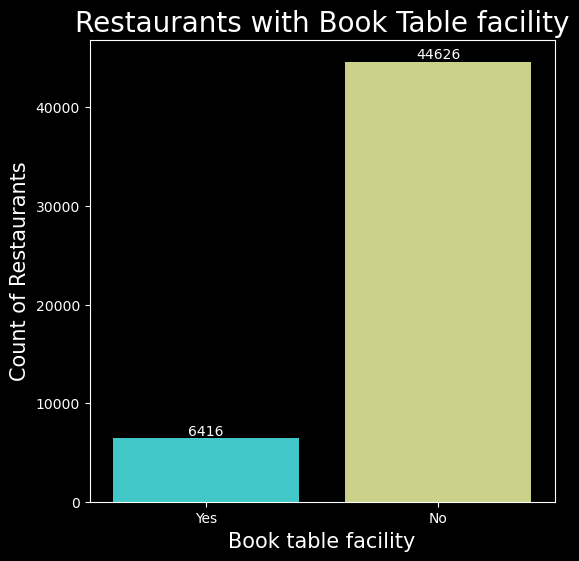

In [48]:
plt.figure(figsize = (6,6))
ax = sns.countplot(x = 'book_table',data=df, palette = 'rainbow')
plt.xlabel("Book table facility", fontsize=15)
plt.ylabel("Count of Restaurants", fontsize=15)
plt.title("Restaurants with Book Table facility", fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

Most of the restaurants are not having Book Table facility

### Online Order vs Rate

Text(0.5, 1.0, 'Online order facility vs Rate')

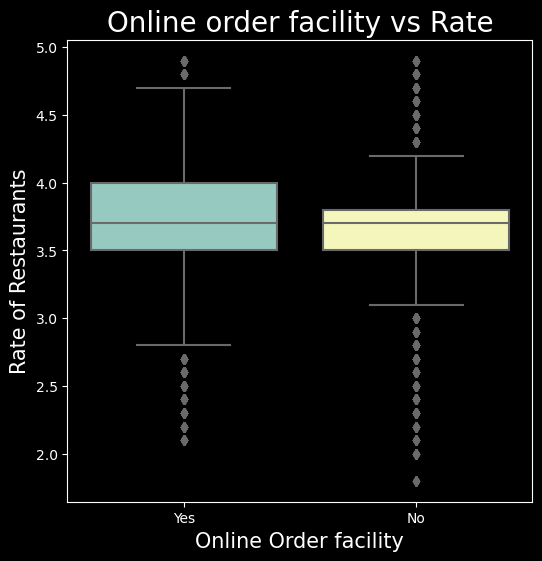

In [49]:
plt.figure(figsize = (6,6))
ax = sns.boxplot(x='online_order', y='rate', data=df)
plt.xlabel("Online Order facility", fontsize=15)
plt.ylabel("Rate of Restaurants", fontsize=15)
plt.title("Online order facility vs Rate", fontsize=20)

Rating in Restaurants having online order facilty is than Restaurant not having online order facility But average rating is same

### book Table vs Rate

Text(0.5, 1.0, 'Book table facility vs Rate')

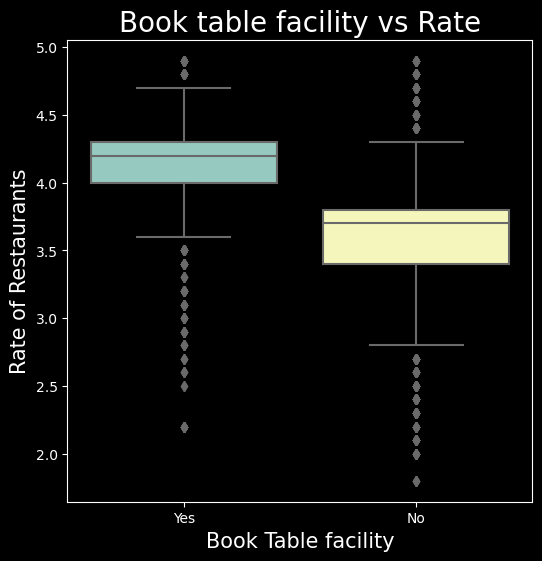

In [50]:
plt.figure(figsize = (6,6))
ax = sns.boxplot(x='book_table', y='rate', data=df)
plt.xlabel("Book Table facility", fontsize=15)
plt.ylabel("Rate of Restaurants", fontsize=15)
plt.title("Book table facility vs Rate", fontsize=20)

Rating in Restaurants having Book table facilty is than Restaurant not having Book table facility and average rating is not same. So Book table facility is essential.

### Online Order facility location wise

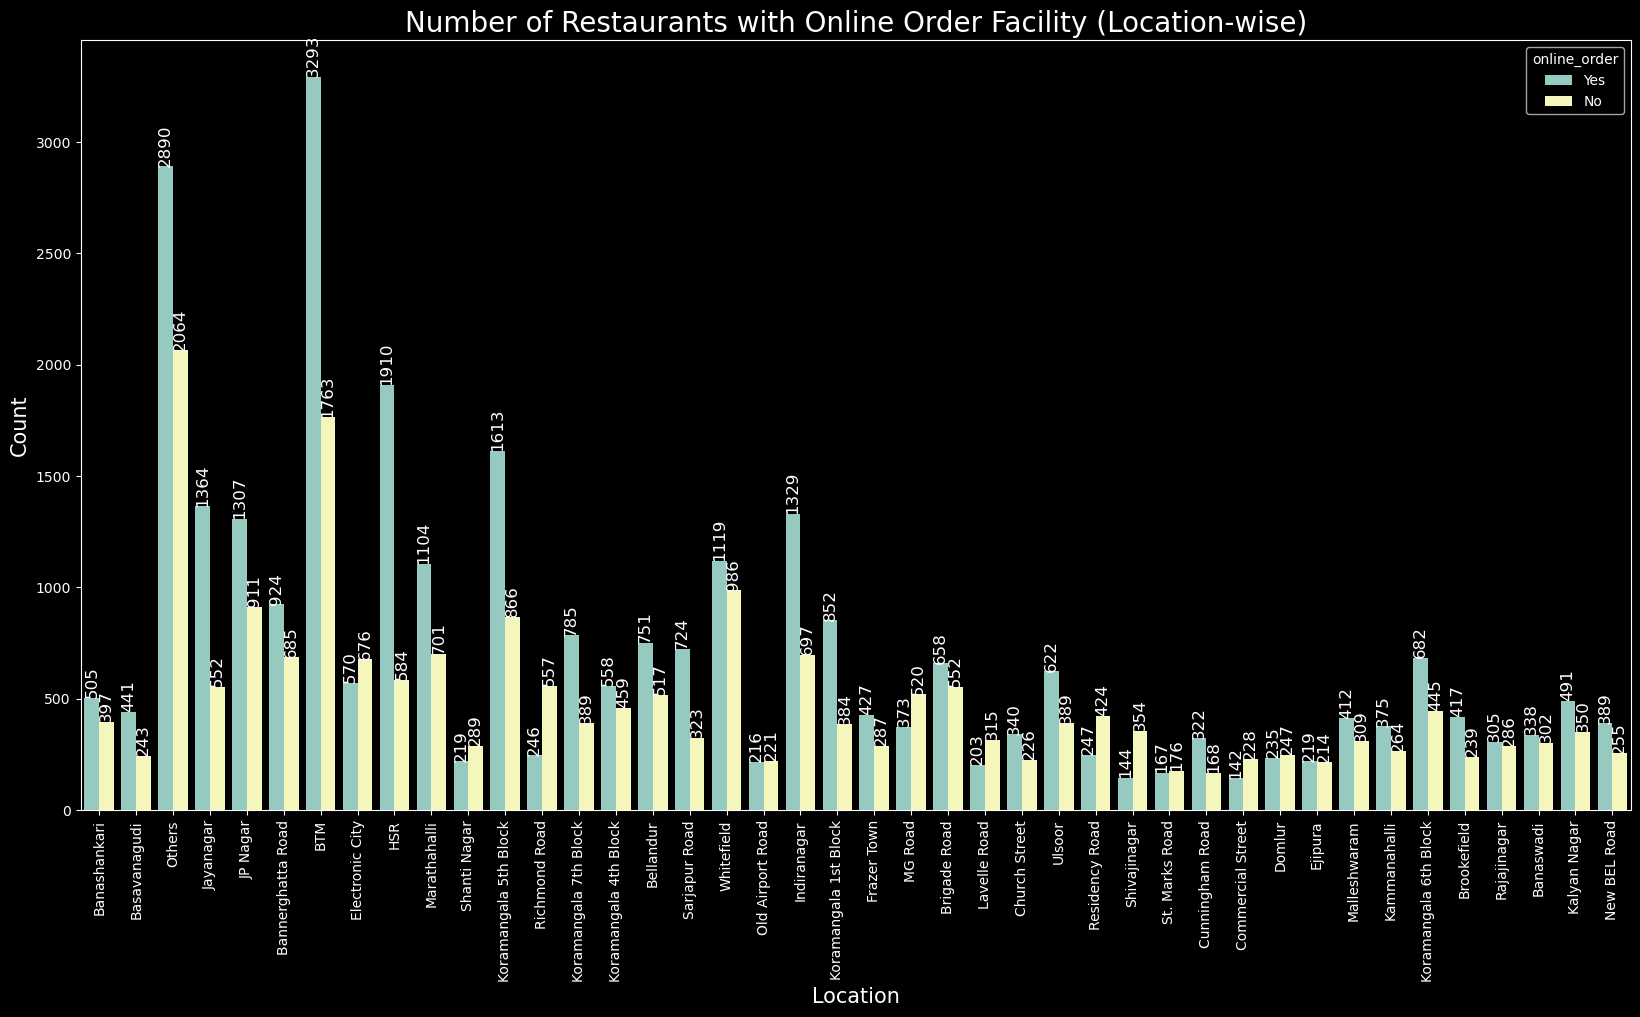

In [51]:
online_order_data = df[df['online_order'] == 'Yes']

plt.figure(figsize=(20, 10))
ax = sns.countplot(x='location', data=df, hue='online_order')
plt.title('Number of Restaurants with Online Order Facility (Location-wise)',  fontsize=20)
plt.xlabel('Location',  fontsize=15)
plt.ylabel('Count',  fontsize=15)
plt.xticks(rotation = 90)

for bars in ax.containers:
    ax.bar_label(bars, rotation=90, fontsize=12)

BTM has highest number of restaurants with online order facility.

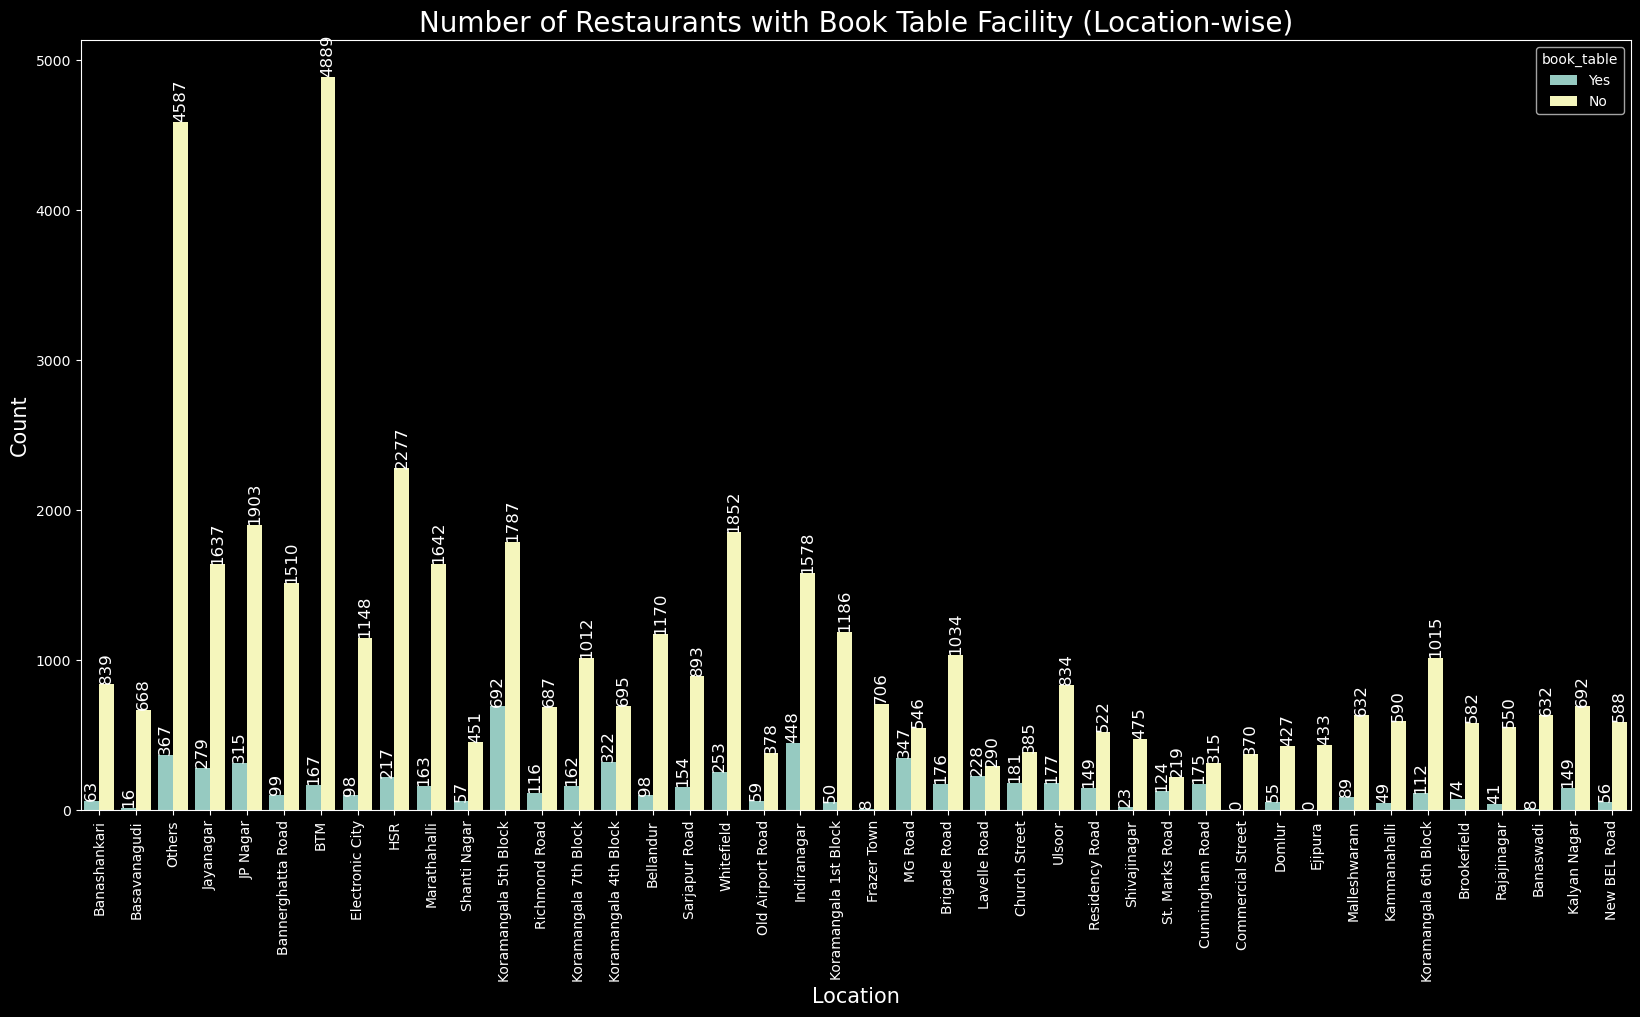

In [52]:
online_order_data = df[df['book_table'] == 'Yes']

plt.figure(figsize=(20, 10))
ax = sns.countplot(x='location', data=df, hue='book_table')
plt.title('Number of Restaurants with Book Table Facility (Location-wise)',  fontsize=20)
plt.xlabel('Location',  fontsize=15)
plt.ylabel('Count',  fontsize=15)
plt.xticks(rotation = 90)

for bars in ax.containers:
    ax.bar_label(bars, rotation=90, fontsize=12)

BTM has highest number of restaurants with Book table facility.

### Types of Restaurant vs Rate

Text(0.5, 1.0, 'Types of Restaurants vs Rate')

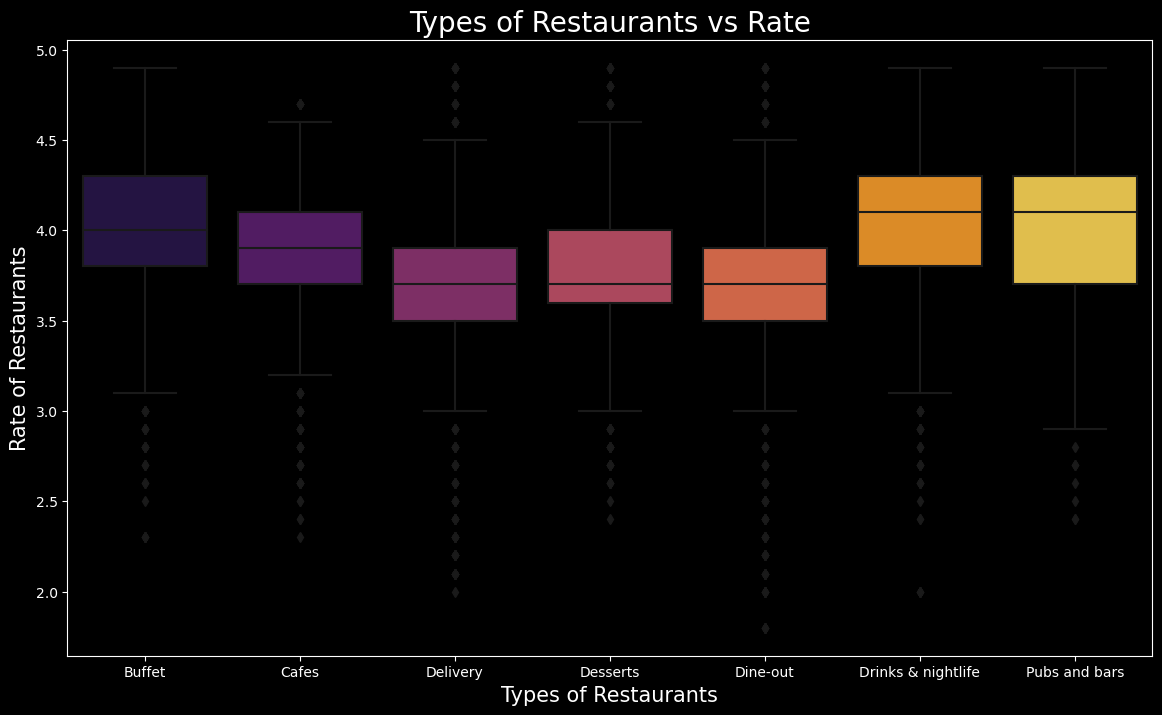

In [53]:
plt.figure(figsize = (14,8))
ax=sns.boxplot(x='Type', y='rate', data=df, palette='inferno')
plt.xlabel("Types of Restaurants", fontsize=15)
plt.ylabel("Rate of Restaurants", fontsize=15)
plt.title("Types of Restaurants vs Rate", fontsize=20)

Rating of Drinks & nightlife, Pubs and bars, Buffet Restaurants are high comparatively

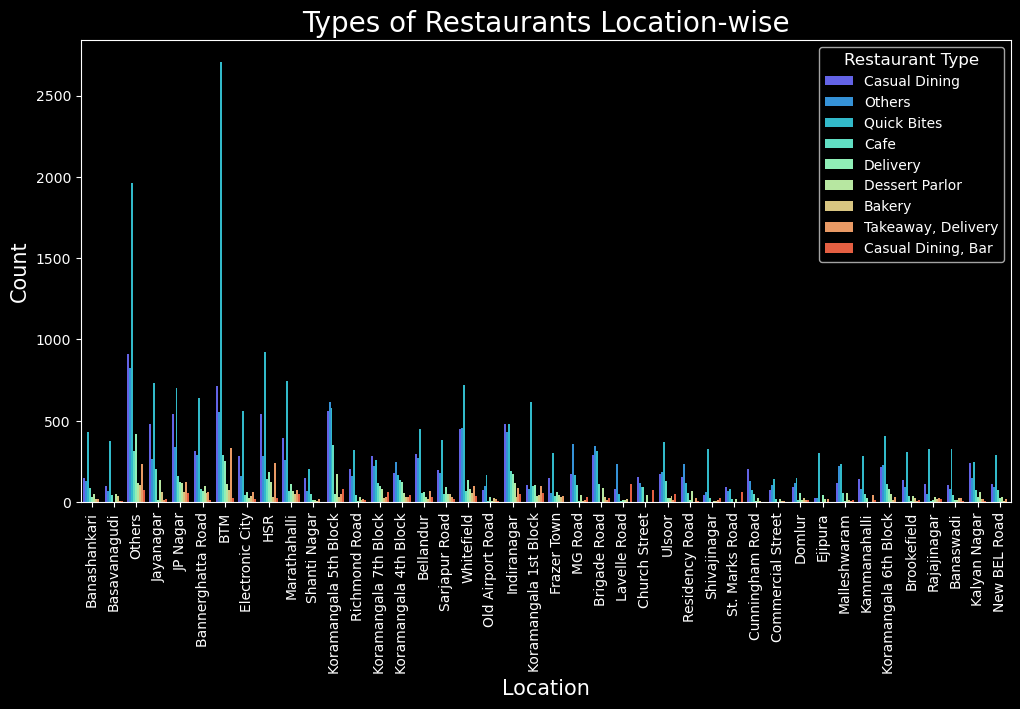

In [54]:
plt.figure(figsize=(12, 6))
sns.countplot(x='location', hue='rest_type', data=df, palette='rainbow')
plt.title('Types of Restaurants Location-wise', fontsize=20)
plt.xlabel('Location', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90)
plt.legend(title='Restaurant Type', title_fontsize=12)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'BTM'),
  Text(6, 0, 'Others'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Lavelle Road'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Brigade Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'Ulsoor'),
  Text(25, 0, 'New BEL Road'),

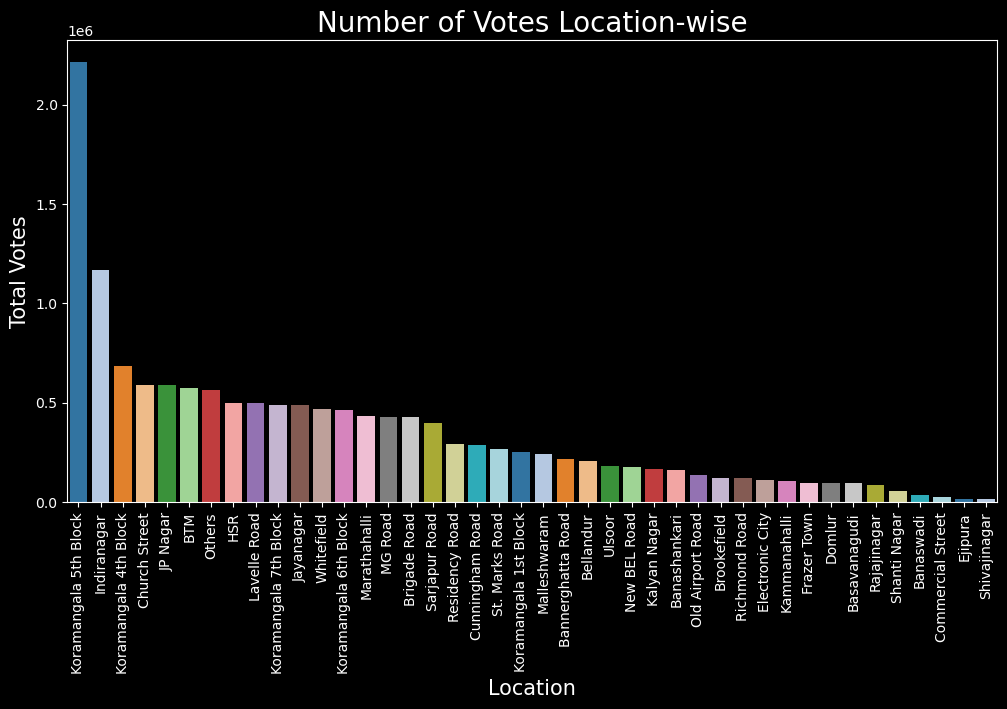

In [55]:
votes_per_location = df.groupby('location')['votes'].sum().reset_index().sort_values(by='votes', ascending = False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='location', y='votes', data=votes_per_location, palette='tab20')
plt.title('Number of Votes Location-wise', fontsize=20)
plt.xlabel('Location', fontsize=15)
plt.ylabel('Total Votes', fontsize=15)
plt.xticks(rotation=90)

Koramangala 5th Block holds highest votes in Bangalore restaurants.

### Top Cuisines

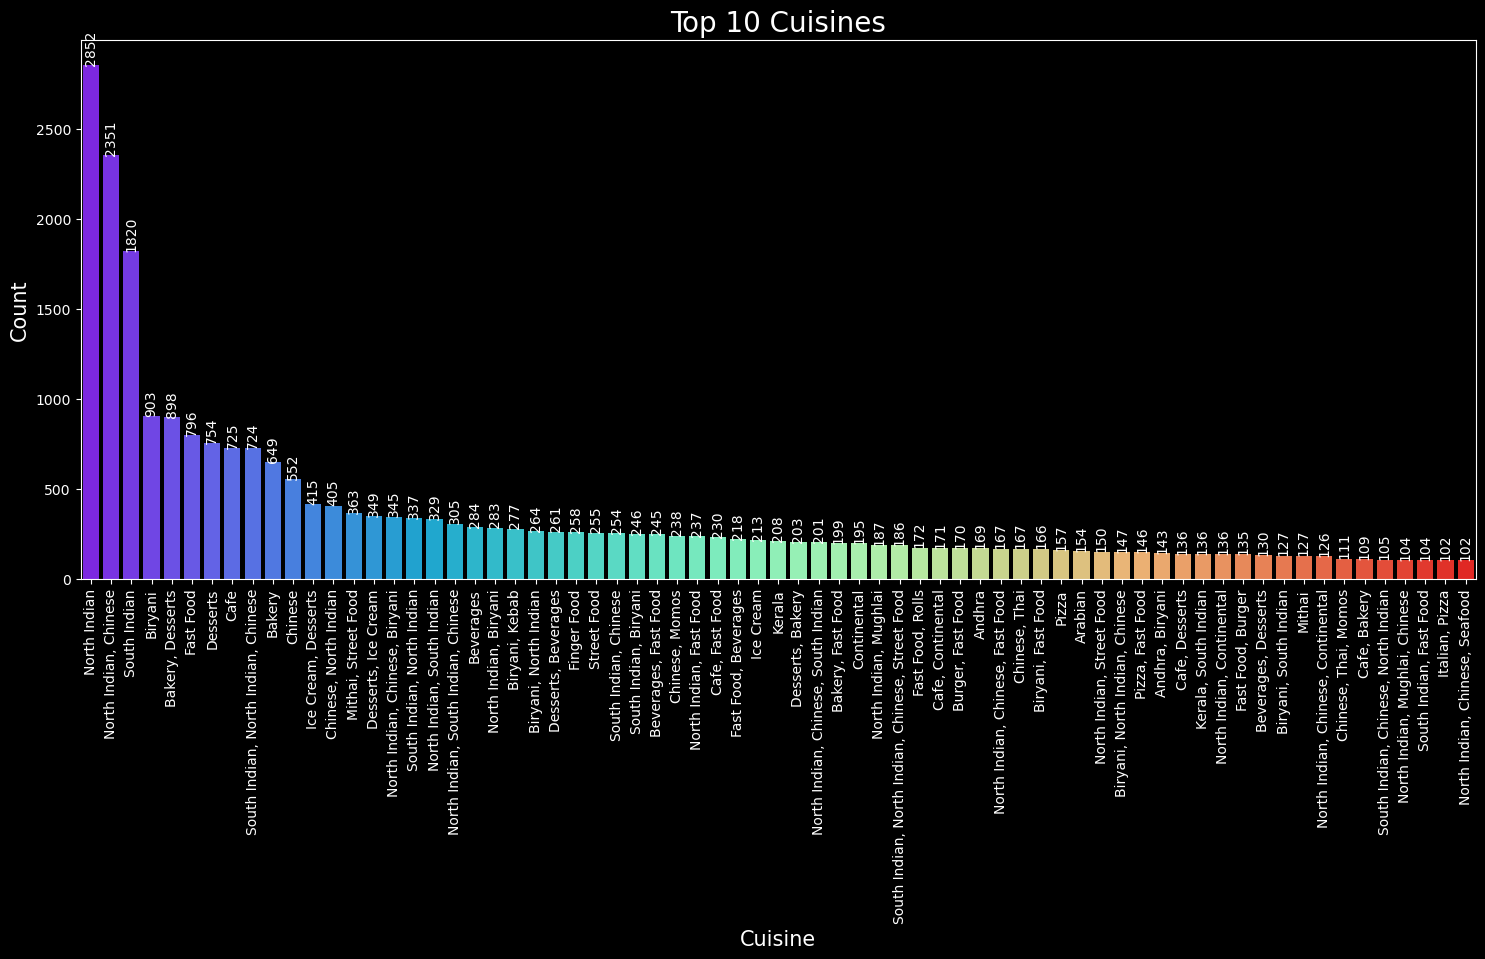

In [57]:
top_cuisines = df[df['cuisines'] != 'Others']['cuisines'].value_counts()
plt.figure(figsize=(18, 7))
ax = sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette='rainbow')
plt.title('Top 10 Cuisines', fontsize=20)
plt.xlabel('Cuisine', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90)

for bars in ax.containers:
    ax.bar_label(bars, rotation=90)

North Indian and Chinese cuisines have more popularity in the Bangalore.

## Conclusion
*  Zomato restaurant data analysis provides valuable insights into customer preferences, market trends, and opportunities for both customers and restaurant owners. By leveraging the findings from this analysis, stakeholders can make informed decisions to enhance their dining experiences or optimize their restaurant businesses